In [1]:
import h5py  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

# Preprocessing

In [2]:
#If using GPU.
physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
#read database.
f = h5py.File('GWdatabase.h5','r')   
f.keys()   

<KeysViewHDF5 ['reduced_data', 'waveforms', 'yeofrho']>

In [4]:
#create a list that contains all the failure cases.
fail_num = []
index = 0
for item in f['reduced_data']['tbounce(s)']:
    if(item == -1):
        fail_num.append(index)
    index += 1
fail_case = []
for index in fail_num:
    fail_case.append([f['reduced_data']['A(km)'][index],f['reduced_data']['omega_0(rad|s)'][index],f['reduced_data']['EOS'][index]])
fail_list= []
for item in fail_case:
    tmp = str(item[2]).split("b'")[1].split("'")[0]
    tmp = "A" + str(int(item[0])) + "w" + str(item[1]) + "0_" + tmp
    fail_list.append(tmp)    

In [148]:
#Get fpeak of all success cases
# fpeak_list = []
# for index in range(len(f['reduced_data']['A(km)'])):
#     if(index not in fail_num):
#         tmp = str(f['reduced_data']['EOS'][index]).split("b'")[1].split("'")[0]
#         tmp = "A" + str(int(f['reduced_data']['A(km)'][index])) + "w" + str(f['reduced_data']['omega_0(rad|s)'][index]) + "0_" + tmp
#         fpeak_list.append([tmp,f['reduced_data']['fpeak(Hz)'][index]])  
# fpeak_name = np.array(fpeak_list)[:,0]
# fpeak_feature = np.array(fpeak_list)[:,1]
# fpeak = []
# index = 0
# for item in f['waveforms']:
#     if(item not in fail_list):
#         fpeak.append(float(fpeak_feature[np.where(fpeak_name == item)[0][0]]))
#     index += 1
# fpeak = np.array(fpeak)

In [170]:
#classify A first and predcit omega(A_num is the list of all the cases that have the particular A value)
# A_num = []
# index = 0
# for item in f['waveforms']:
#     if(item not in fail_list):
#         if(float(item.split('_')[0].split('w')[0].split('A')[1]) == 634):
#             A_num.append(index)
#     index+=1
# len(A_num)

# Choose which label we want to predict 

In [8]:
#get the label of w.
labels = []
index = 0
for item in f['waveforms']:
    if(item not in fail_list):
        #if(index in A_num):
            labels.append(float(item.split('_')[0].split('w')[1]))
    index += 1

In [6]:
#get the label of EOS.
labels = []
index = 0
for item in f['waveforms']:
    if(item not in fail_list):
        #if(index in A_num):
            labels.append(str(item.split('_')[1]))
    index += 1

In [6]:
#get the label of A.
labels = []
index = 0
for item in f['waveforms']:
    if(item not in fail_list):
        #if(index in A_num):
            labels.append(str(item.split('_')[0].split('w')[0].split('A')[1]))
    index += 1

In [7]:
len(labels)

1764

In [8]:
np.unique(labels)

array(['BHBL', 'BHBLP', 'GShenFSU1.7', 'GShenFSU2.1', 'GShenNL3', 'HSDD2',
       'HSFSG', 'HSIUF', 'HSNL3', 'HSTM1', 'HSTMA', 'HShen', 'HShenH',
       'LS180', 'LS220', 'LS375', 'SFHo', 'SFHx'], dtype='<U11')

In [6]:
#signal preprocessing used by the paper.(We don't need it.)
from scipy import signal
from scipy.fft import fft, fftshift

<ipython-input-47-03b707c42d60>:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(4, 4), dpi=64)


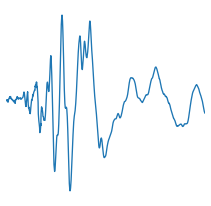

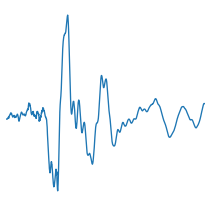

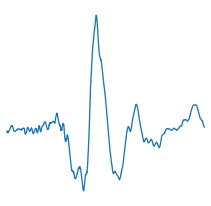

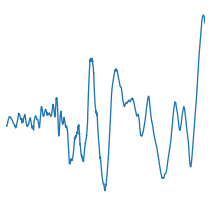

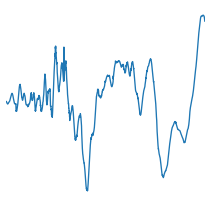

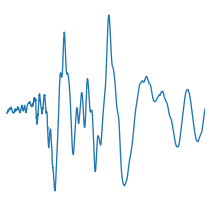

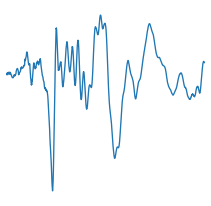

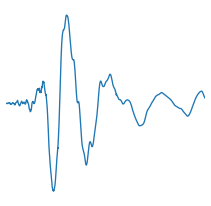

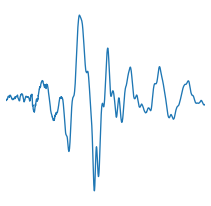

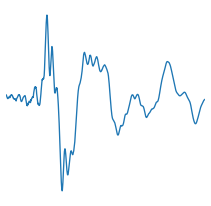

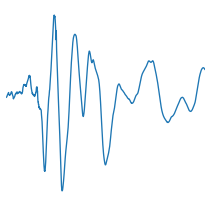

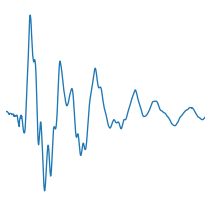

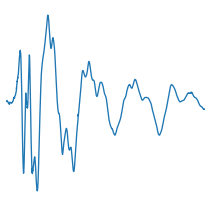

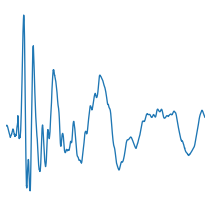

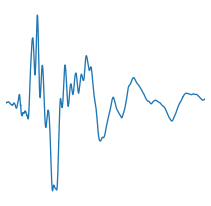

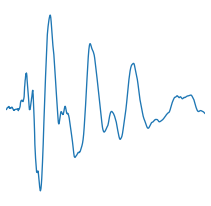

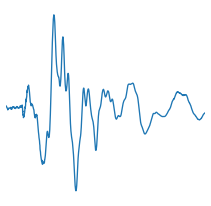

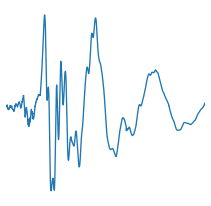

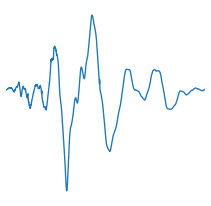

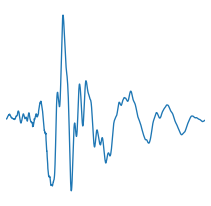

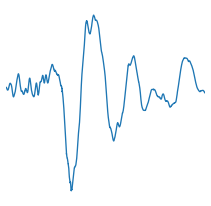

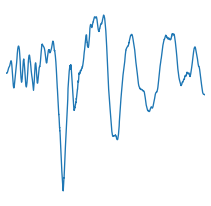

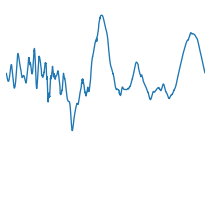

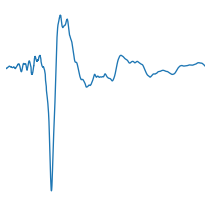

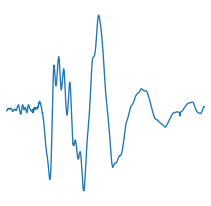

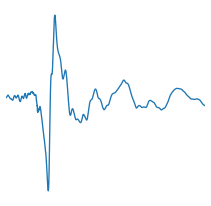

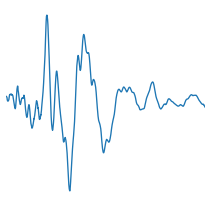

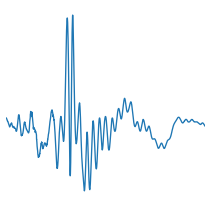

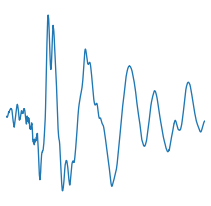

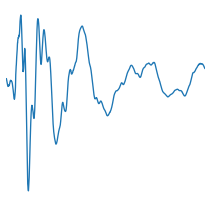

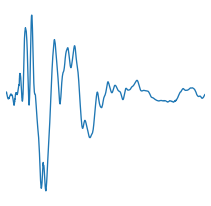

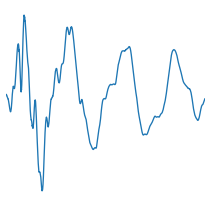

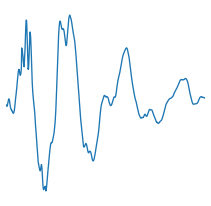

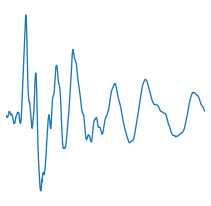

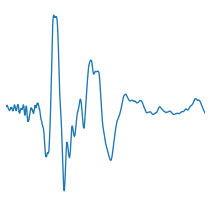

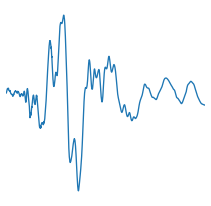

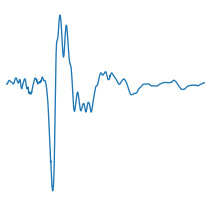

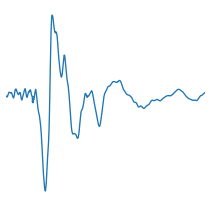

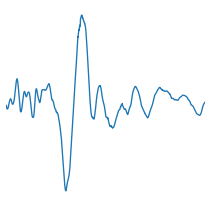

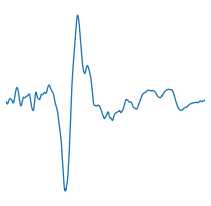

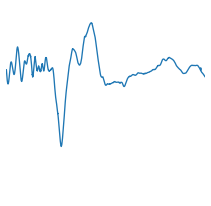

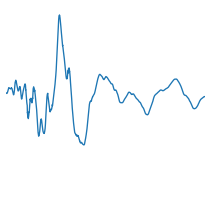

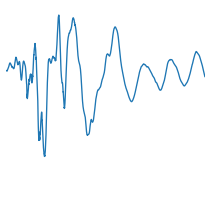

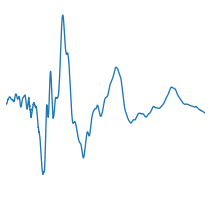

Error in callback <function flush_figures at 0x7f57971f8160> (for post_execute):


KeyboardInterrupt: 

In [47]:
#draw the image which is 256*256.
index = 0
for item in f['waveforms']:
    if(item not in fail_list):
        #for j in range(5):
        x = f['waveforms'][item]['t-tb(s)']
        y = f['waveforms'][item]['strain*dist(cm)']
        y = np.array(y)
        #window = signal.tukey(len(y),0.1)
        #y = y * window
        #b, a = signal.butter(10, 0.25, 'lowpass')
        #y = signal.filtfilt(b, a, y)
        #y = y - min(y)
        #y = y / max(y)
        #y = signal.resample(y, int(len(y)/16))
        #num_resample = len(y)
        #new_x = []
        #for j in range(num_resample):
            #new_x.append(x[j*16])
        #for j in range(5):
            ###################aug_data = noise[0 + j*len(y) :(j+1)*len(y)]*300000000000000000
            ###################y = y + aug_data
        y = y - min(y)
        y = y / max(y)
        plt.figure(figsize=(4, 4), dpi=64)
        plt.plot(np.array(x),y)
        plt.xlim(-0.01, 0.006)
        plt.axis('off')
        #title = "./A/" + str(index) + "_" + str(j) + ".jpeg"
        title = "./Final_EOS/" + str(index) + ".jpeg"
        plt.savefig(title,dpi=64)
    index += 1

# Get data with augmentation(skip it if we don't need augmentation)

In [5]:
#get the label of the data for EOS
labels = []
index = 0
index_fail = 0
for item in f['reduced_data']['EOS']:
    if(index != fail_list[index_fail]):
        labels.append(str(item))
    else:
        labels.append(-1)
        index_fail += 1
    index += 1

In [6]:
labels = []
index = 0
index_fail = 0
for a in f['waveforms']:
    if(index != fail_list[index_fail]):
        labels.append(float(a.split('_')[0].split('w')[0].split('A')[1]))
    else:
        labels.append(-1)
        index_fail += 1
    index += 1

In [37]:
#tranform the label to what it should be.
labels = np.array(labels)
labels = np.where(labels == "b'SFHo_ecapture_0.1'", "b'SFHo'", labels)
labels = np.where(labels == "b'SFHo_ecapture_1.0'", "b'SFHo'", labels)
labels = np.where(labels == "b'SFHo_ecapture_10.0'", "b'SFHo'", labels)

<ipython-input-37-333449b7f6ef>:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  labels = np.where(labels == "b'SFHo_ecapture_0.1'", "b'SFHo'", labels)


In [7]:
[0:-1]true_list = []
for i in range(1824):
    if i not in fail_list:
        true_list.append(i)

In [8]:
train_num = np.random.choice(true_list, 1234, replace=False)

In [9]:
test_list = []
for i in range(1824):
    if i not in fail_list:
        if i not in train_num:
            test_list.append(i)

In [10]:
test_num = np.random.choice(test_list, 265, replace=False)

In [11]:
#read random image data.
from PIL import Image
import numpy as np
X_train = []
y_train = []
for i in train_num:
    for j in range(5):
        title = 'image_aug/'+ str(i) + "_" + str(j) + '.jpeg'
        image = Image.open(title).convert('L')
        X_train.append(np.array(image))
        y_train.append(labels[i])

In [12]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train.shape

(6170, 256, 256)

In [13]:
X_test = []
y_test = []
for i in test_num:
    title = 'image_64_normalization(-0.02, 0.05))/'+ str(i) + '.jpeg'
    image = Image.open(title).convert('L')
    X_test.append(np.array(image))
    y_test.append(labels[i])

In [35]:
X_test = np.array(X_test)
y_test = np.array(y_test)
X_test.shape

(265, 256, 256, 1)

In [15]:
validation_list = []
for i in range(1824):
    if i not in fail_list:
        if i not in train_num:
            if i not in test_num:
                validation_list.append(i)

In [16]:
X_validation = []
y_validation = []
for i in validation_list:
    title = 'image_64_normalization(-0.02, 0.05))/'+ str(i) + '.jpeg'
    image = Image.open(title).convert('L')
    X_validation.append(np.array(image))
    y_validation.append(labels[i])

In [17]:
X_validation = np.array(X_validation)

# Get data with no Augmentation

In [48]:
#read image data.
from PIL import Image
import numpy as np
data = []
index = 0
for item in f['waveforms']:
    if(item not in fail_list):
        #if(index in A_num):
        #for j in range(5):
            title = 'Final_EOS/'+ str(index) + '.jpeg'
            #title = 'A/'+ str(i) + '.jpeg'
            image = Image.open(title).convert('L')
            data.append(np.array(image))
    index += 1

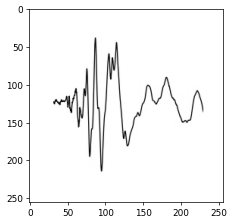

In [49]:
#check the data.
plt.figure(figsize=(4, 4), dpi=64)
plt.imshow(data[0], cmap='gray')

In [50]:
#transform the data type to numpy array
data = np.array(data)
data.shape

(1764, 256, 256)

# Model

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
#from keras.utils import np_utilsy
from keras import backend as K
import os
import gc

In [52]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(data,labels,test_size=0.2,random_state=5)
#X_train, X_test, X_fpeak_train, X_fpeak_test, y_train, y_test = train_test_split(data,fpeak,labels,test_size=0.2,random_state=5)

In [37]:
#further split the data into test and validation
#X_test, X_validation, y_test, y_validation = train_test_split(X_test,y_test,test_size=0.5,random_state=0)

In [53]:
X_train.shape

(1411, 256, 256)

In [54]:
#transfer the data shape for model training
X_train = X_train.reshape(X_train.shape[0], 256, 256, 1)
X_test = X_test.reshape(X_test.shape[0], 256, 256, 1)
#X_fpeak_train = X_fpeak_train.reshape(X_fpeak_train.shape[0], 1)
#X_fpeak_test = X_fpeak_test.reshape(X_fpeak_test.shape[0], 1)
#X_validation = X_validation.reshape(X_validation.shape[0], 256, 256, 1)

In [55]:
#using one hot to encode the label.
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

In [56]:
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from keras.layers import Concatenate
from keras.models import Model

In [57]:
#y_train = np.array(y_train)
#y_test = np.array(y_test)

In [60]:
#our model
model = Sequential()
model.add(Conv2D(64, (5, 5), input_shape=(256, 256, 1), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (5, 5), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(18, activation='softmax'))
#model.add(Dense(1, activation='relu'))
optimizer = keras.optimizers.Adam(learning_rate=0.00001)
#optimizer = keras.optimizers.Adam(learning_rate=0.000003)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
#model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])

In [61]:
history = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)
#history = model.fit(x=[X_train, X_fpeak_train], y=y_train, validation_data=([X_test, X_fpeak_test], y_test), epochs=200, batch_size=32)

Epoch 1/100
45/45 [==============================] - 6s 120ms/step - loss: 5.9512 - acc: 0.0581 - val_loss: 2.9272 - val_acc: 0.1020
Epoch 2/100
45/45 [==============================] - 5s 111ms/step - loss: 3.0769 - acc: 0.0657 - val_loss: 2.9176 - val_acc: 0.1020
Epoch 3/100
45/45 [==============================] - 5s 112ms/step - loss: 2.9883 - acc: 0.0617 - val_loss: 2.8910 - val_acc: 0.1020
Epoch 4/100
45/45 [==============================] - 5s 111ms/step - loss: 2.9370 - acc: 0.0634 - val_loss: 2.8835 - val_acc: 0.0992
Epoch 5/100
45/45 [==============================] - 5s 112ms/step - loss: 2.9477 - acc: 0.0480 - val_loss: 2.8737 - val_acc: 0.0623
Epoch 6/100
45/45 [==============================] - 5s 115ms/step - loss: 2.9297 - acc: 0.0486 - val_loss: 2.8787 - val_acc: 0.1020
Epoch 7/100
45/45 [==============================] - 5s 112ms/step - loss: 2.9065 - acc: 0.0630 - val_loss: 2.8848 - val_acc: 0.0992
Epoch 8/100
45/45 [==============================] - 5s 112ms/step - 

45/45 [==============================] - 5s 112ms/step - loss: 2.0185 - acc: 0.2892 - val_loss: 2.2767 - val_acc: 0.1841
Epoch 63/100
45/45 [==============================] - 5s 111ms/step - loss: 1.9751 - acc: 0.2902 - val_loss: 2.2860 - val_acc: 0.1955
Epoch 64/100
45/45 [==============================] - 5s 111ms/step - loss: 1.9635 - acc: 0.3223 - val_loss: 2.2455 - val_acc: 0.2096
Epoch 65/100
45/45 [==============================] - 5s 111ms/step - loss: 1.9258 - acc: 0.3114 - val_loss: 2.2997 - val_acc: 0.1870
Epoch 66/100
45/45 [==============================] - 5s 111ms/step - loss: 1.9308 - acc: 0.3269 - val_loss: 2.2968 - val_acc: 0.1756
Epoch 67/100
45/45 [==============================] - 5s 111ms/step - loss: 1.8536 - acc: 0.3364 - val_loss: 2.2541 - val_acc: 0.2040
Epoch 68/100
45/45 [==============================] - 5s 111ms/step - loss: 1.8459 - acc: 0.3643 - val_loss: 2.2734 - val_acc: 0.1870
Epoch 69/100
45/45 [==============================] - 5s 111ms/step - loss:

In [106]:
#check the accuracy.
answer = model.predict(X_validation)
index = 0
correct = 0
for item in answer:
    if(abs(item - y_validation[index]) <= 0.25):
        correct += 1
    index += 1
correct/index

0.6666666666666666

In [58]:
#check the accuracy.
answer = np.argmax(model.predict(X_validation), axis=1)
answer_onehot = np.zeros((answer.size, answer.max()+1))
answer_onehot[np.arange(answer.size),answer] = 1
answer_decode = label_decode(label_encoder, answer_onehot)
index = 0
correct = 0
for item in answer_decode:
    if(item == y_validation[index]):
        correct += 1
    index += 1
correct/index

0.0

In [230]:
#our model adding fpeak
a1 = Input(shape=(256, 256, 1))
a2 = Conv2D(64, (5, 5), padding="same", activation='relu')(a1)
a3 = MaxPooling2D(pool_size=(2, 2))(a2)
a4 = Conv2D(128, (5, 5), padding="same", activation='relu')(a3)
a5 = MaxPooling2D(pool_size=(2, 2))(a4)
a6 = Conv2D(256, (5, 5), padding="same", activation='relu')(a5)
a7 = MaxPooling2D(pool_size=(2, 2))(a6)
a8 = Conv2D(256, (3, 3), padding="same", activation='relu')(a7)
a9 = MaxPooling2D(pool_size=(2, 2))(a8)
a10 = Conv2D(256, (3, 3), padding="same", activation='relu')(a9)
a11 = MaxPooling2D(pool_size=(2, 2))(a10)
a12 = Dropout(0.5)(a11)
a13 = Flatten()(a12)
a14 = Dense(1024, activation='relu')(a13)


b1 = Input(shape=(1,))
b2 = Activation('relu')(b1)

concat = Concatenate()([a14, b2])
a15 = Dense(512, activation='relu')(concat)
a16 = Dense(128, activation='relu')(a15)
outputs = Dense(32, activation='softmax')(a16)

model = keras.Model(inputs=[a1, b1], outputs=outputs)

optimizer = keras.optimizers.Adam(learning_rate=0.00001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])

Confusion matrix, without normalization
[[ 4  0  0  0  1  0  0]
 [ 0 14  0  0  0  1  0]
 [ 0  3 15  0  0  0  2]
 [ 0  0  0  2  1  0  0]
 [ 1  2  0  0 12  1  0]
 [ 0  0  0  0  1  6  0]
 [ 0  0  0  0  0  0 16]]


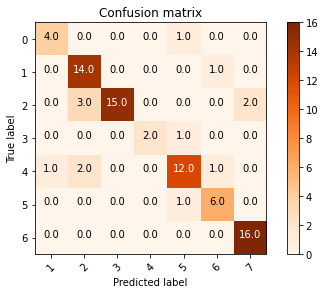

In [113]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_validation, answer_decode)
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Oranges):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(cm.shape[1])
    plt.xticks(tick_marks, rotation=45)
    ax = plt.gca()
    ax.set_xticklabels((ax.get_xticks() +1).astype(str))
    plt.yticks(tick_marks)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.1f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

np.set_printoptions(precision=1) 
print('Confusion matrix, without normalization')aot
print(cm)
fig, ax = plt.subplots()
plot_confusion_matrix(cm)

plt.show()

In [82]:
model.save('model_GW_W_76%.h5')

In [83]:
model = keras.models.load_model('model_GW_W_76%.h5')

# Check new data 

In [ ]:
#check the accuracy of the new data
from PIL import Image
import numpy as np
X_validation = []
for index in range(9):
    title = 'test/'+ str(index) + '.jpeg'
    image = Image.open(title).convert('L')
    X_validation.append(np.array(image))
X_validation = np.array(X_validation)
X_validation = X_validation.reshape(X_validation.shape[0], 256, 256, 1)
answer = np.argmax(model.predict(X_validation), axis=1)
answer_onehot = np.zeros((answer.size, answer.max()+1))
answer_onehot[np.arange(answer.size),answer] = 1
answer_decode = label_decode(label_encoder, answer_onehot)

# Utils

In [4]:
f2 = h5py.File('noise_data.hdf5','r')   
f2.keys()
noise = f2['strain']['Strain']

<KeysViewHDF5 ['meta', 'quality', 'strain']>

In [ ]:
labels = np.where(labels == "b'BHBL'", "B", labels)
labels = np.where(labels == "b'BHBLP'", "B", labels)
labels = np.where(np.unique(labels == "b'GShenFSU1.7'", "G", labels)
labels = np.where(labels == "b'GShenFSU2.1'", "G", labels)
labels = np.where(labels == "b'GShenNL3'", "G", labels)
labels = np.where(labels == "b'HSDD2'", "H", labels)
labels = np.where(labels == "b'HSFSG'", "H", labels)
labels = np.where(labels == "b'HSIUF'", "H", labels)
labels = np.where(labels == "b'HSNL3'", "H", labels)
labels = np.where(labels == "b'HSTM1'", "H", labels)
labels = np.where(labels == "b'HSTMA'", "H", labels)
labels = np.where(labels == "b'HShen'", "H", labels)
labels = np.where(labels == "b'HShenH'", "H", labels)
labels = np.where(labels == "b'LS180'", "L", labels)
labels = np.where(labels == "b'LS220'", "L", labels)
labels = np.where(labels == "b'LS375'", "L", labels)
labels = np.where(labels == "b'SFHo'", "S", labels)
labels = np.where(labels == "b'SFHx'", "S", labels)

In [ ]:
#tranform the label to what it should be.
labels = np.array(labels)
labels = np.where(labels == "b'SFHo_ecapture_0.1'", "b'SFHo'", labels)
labels = np.where(labels == "b'SFHo_ecapture_1.0'", "b'SFHo'", labels)
labels = np.where(labels == "b'SFHo_ecapture_10.0'", "b'SFHo'", labels)

In [ ]:
from scipy import signal
data = []
index = 0
for item in f['waveforms']:
    if(index not in fail_list):
        if(index in A_num):
#             Timestamp = np.array(f['waveforms'][item]['t-tb(s)'])
#             F_index = np.where(Timestamp>=-0.03)[0][0]
#             S_index = np.where(Timestamp<=0.07)[0][-1]
            data.append(signal.resample(np.array(f['waveforms'][item]['strain*dist(cm)']),12000))
    index += 1
np.array(data).shape
from keras.layers import GRU, LSTM, Activation
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from keras import regularizers
data = np.array(data)
data = data.reshape(data.shape[0], 1, 12000)
model = Sequential()
model.add(GRU(500, input_shape = (1,12000), return_sequences = False))
#model.add(GRU(300, return_sequences = True))
# model.add(Dropout(0.2))
# model.add(GRU(100, return_sequences = True))
# model.add(Dropout(0.2))
# model.add(GRU(100, return_sequences = True))
# model.add(Dropout(0.2))
# model.add(GRU(100, return_sequences = False))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
model.add(Dense(20, activation='softmax'))
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=16)

In [ ]:
#paper's model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(256, 256, 1), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(18, activation='softmax'))
optimizer = keras.optimizers.RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])